## Exploratory Data Analysis

Fundamental Data Learning | Week 2

The following are the head() of 2 provided data frames for this excercise:
- df1 is taken from steps.csv
- df2 is taken from survey.csv

steps.csv is using semicolon for its separator, which is not the standard csv separator.
Therefore in .read_csv command, the type of separator must be defined.

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('steps.csv', sep=';')
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df2 = pd.read_csv('survey.csv')
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In the next step, I merged the 2 above data frame based on the ids. Then I create a column mean_of_steps filled with the mean steps per participant and create a separate dataframe with 3 data columns I want to work with: mean of steps, weight and height.

In [12]:
#merge data frame by id
df_merged = pd.merge(df1, df2, on = 'id')

#create column with mean steps per participant
df_merged = df_merged.assign(mean_of_steps=df_merged.mean(axis=1))
df_merged["mean_of_steps"] = df_merged["mean_of_steps"].round() #round the mean value
df_merged = df_merged[(df_merged['mean_of_steps'] < 20000) & (df_merged['weight'] < 200) & (df_merged['height'] > 0)] #clean up data that is far outside the range

#create new data frame with mean_of_steps, weight, height to work on in the later step
df_merged1 = df_merged[["mean_of_steps", "weight", "height"]]
df_merged1.dropna() #remove row with Nan value

df_merged1.head()

,mean_of_steps,weight,height
0,9907.0,98.0,178.0
1,5520.0,77.0,180.0
2,8032.0,83.0,180.0
3,2917.0,80.0,178.0
4,4866.0,61.0,167.0


## The relation of meansteps per participant with at least 2 other quantitative variables

The below graphs shows relations of meansteps per participant with participant's weights and heights.
First graph shows correlation matrix including the aforementioned 3 variables in heatmap. The heatmap graph doesn't show clearly the relationships between participants' mean of steps, weight and height.

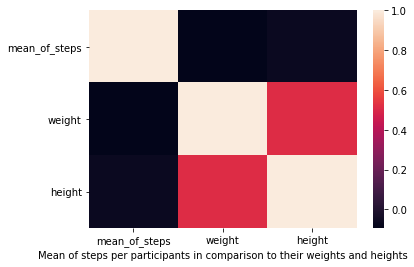

In [26]:
corr = df_merged1[["mean_of_steps", "weight", "height"]].corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) 
plt.xlabel('Mean of steps per participants in comparison to their weights and heights') 
plt.show()

The below graph show the mean of steps in comparison to the participants' weight with mean of steps on the x axis and weight on the y axis. In this graph, we can analyze better the relationship of participants' weights and their mean of steps. Most participants are weighted 50 to 100 kgs and the range of steps are from 0 to about 12500. For the participants with weight more than 100kgs, it seems like the higher participant's weight is the less mean of steps they have. However, participants weighted 50 to 100 kgs have pretty vary their mean of steps.

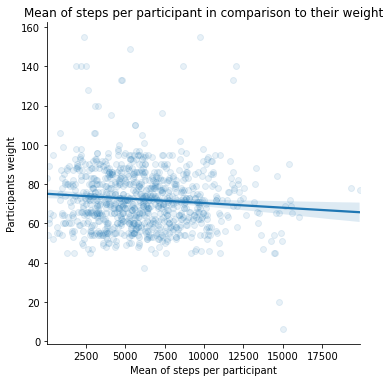

In [14]:
sns.lmplot(x='mean_of_steps', y='weight', fit_reg=True, data=df_merged1, scatter_kws={'alpha':0.1})
plt.xlabel('Mean of steps per participant') 
plt.ylabel('Participants weight')
plt.title('Mean of steps per participant in comparison to their weight')
plt.show()

The below graph shows the mean of steps in comparison to the participants' height with mean of steps on the x axis and height on the y axis. In this graph, we can analyze better the relationship of participants' heights and their mean of steps. The participants are at least 150cms tall and their mean of steps are ranged from 0 to 11000. The graph shows very distributed dots, meaning that the participants height seem to have no relation to participants' mean of steps.

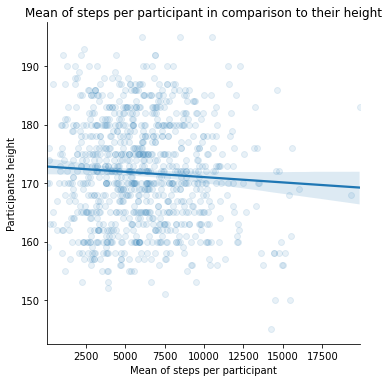

In [15]:
sns.lmplot(x='mean_of_steps', y='height', fit_reg=True, data=df_merged1, scatter_kws={'alpha':0.1})
plt.xlabel('Mean of steps per participant') 
plt.ylabel('Participants height')
plt.title('Mean of steps per participant in comparison to their height')
plt.show()

The below is the Pearson’s correlation for participants' mean of steps to their weights and mean of steps to their height. There's a stronger negative relationship between participants' mean of steps and their weights. The relationship between mean of steps and heights is not strong because it's very close to zero, it seems like it is neither strong relationship to positive nor negative.

In [27]:
from scipy.stats.stats import pearsonr
print(pearsonr(df_merged1['mean_of_steps'],df_merged1['weight']))
print(pearsonr(df_merged1['mean_of_steps'],df_merged1['height']))

(-0.09316496286072785, 0.004681867975658256)
(-0.06182714359885342, 0.06085408922823671)


## The relation of mean steps per participant with a qualitative variable with two levels 

For this section, I will need a new data frame with mean_of_steps, gender and education_1 columns.

In [17]:
#create new data frame with mean_of_steps, gender, education_1 to work on in the later step
df_merged2 = df_merged[["mean_of_steps", "gender", "education_1"]]
df_merged2.dropna() #remove row with Nan value

df_merged2.head()

,mean_of_steps,gender,education_1
0,9907.0,Male,Master or doctorate
1,5520.0,Male,Bachelor
2,8032.0,Male,Master or doctorate
3,2917.0,Male,Bachelor
4,4866.0,Female,Bachelor


The below violin plots show the relations between the participants education, gender and mean of steps. From the graph below we can see that female with high school education have more mean of steps and there is very little amount of female participants from primary school background. As for the male participants,  a small amount of bachelor-educated participants have more than 11000 mean of steps. Male participants with primary educations also doesn't have high mean of steps, the highest point didn't reach 10000 mean of steps with the mode mean of steps lower than 5000.

Text(0.5, 1.0, 'Mean of steps per participant in comparison to their gender and education')

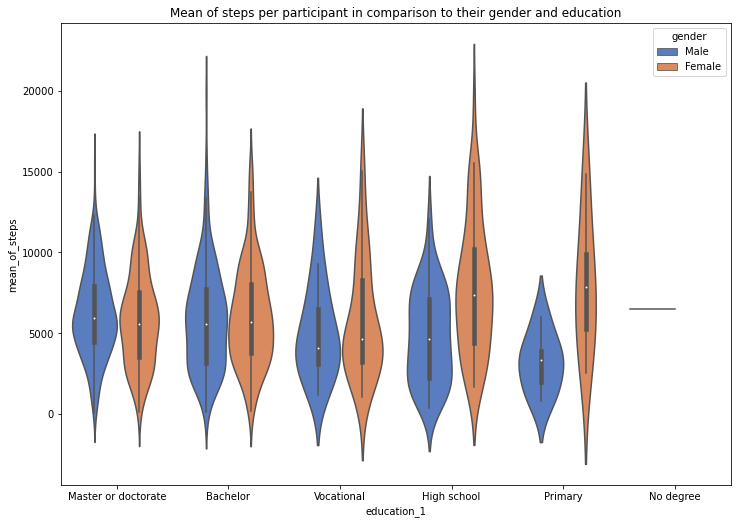

In [28]:
size = (12, 8.5)
fig, ax = plt.subplots(figsize=size)
sns.violinplot(x="education_1", y="mean_of_steps", hue="gender",
                    data=df_merged2, palette="muted")
plt.title('Mean of steps per participant in comparison to their gender and education')

## The relation of gender with education level

The below is a bar graph showing the relation of gender and education of the participants. The graph shows that there are more male participants than female. The highest number of male participants are with master or doctorate education and bachelor education in second place. For the female participants, the highest education is bachelor with master or doctorate in the second place.

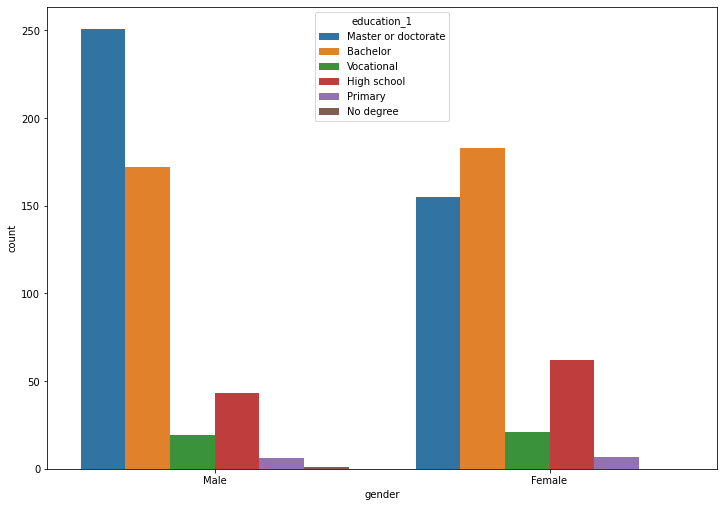

In [20]:
size = (12, 8.5)
fig, ax = plt.subplots(figsize=size)
sns.countplot(x="gender", hue="education_1", data=df_merged)
plt.show()

The below cross table shows relevant percentages of participants gender and education. Using percentage shows the distribution more equally accounts the fact that there are more men in the study.

In [21]:
pd.crosstab(df_merged["gender"], df_merged["education_1"], normalize="columns")

education_1,Bachelor,High school,Master or doctorate,No degree,Primary,Vocational
gender,,,,,,
Female,0.515493,0.590476,0.381773,0.0,0.538462,0.525
Male,0.484507,0.409524,0.618227,1.0,0.461538,0.475
